In [107]:

### EXAMPLE OF JUPYTER NOTEBOOK
### LIBRARIES
import os
import pandas as pd
import matplotlib.pylab as plt

In [121]:
# Info
folder_name = "/home/fabio/Desktop/PyCharm_ARPAL/soilslips-ws/dynamic/outcome/scenarios_datasets/"
file_name = "scenarios_from_201401010000_to_201912300000.csv"
alert_area_tag = 'alert_area_c'
time_format = '%m-%d %H'

time_start = '2016-01-01'
time_end = '2016-04-01'

In [126]:
# Organize datasets
dframe_file = pd.read_csv(os.path.join(folder_name, file_name))
#dframe_file = dframe_file.reset_index()
dframe_file = dframe_file.set_index('time')
dframe_file = dframe_file.iloc[::-1]

#dframe_selection = dframe_file[pd.Timestamp(time_start):pd.Timestamp(time_end)]

KeyError: Timestamp('2016-01-01 00:00:00')

In [124]:
# Select datasets
dframe_data = dframe_file.loc[dframe_file['event_domain'] == alert_area_tag]

In [114]:
# Get datasets
series_sm_first = dframe_data['sm_value_first']
series_sm_last = dframe_data['sm_value_last']
series_rain_acc_3H = dframe_data['rain_accumulated_3H']
series_rain_acc_6H = dframe_data['rain_accumulated_6H']

In [115]:
# Get time
tick_time_period = pd.DatetimeIndex(list(dframe_data.index))
tick_time_idx = range(0, tick_time_period.size)
tick_time_labels = [tick_label.strftime(time_format) for tick_label in tick_time_period]

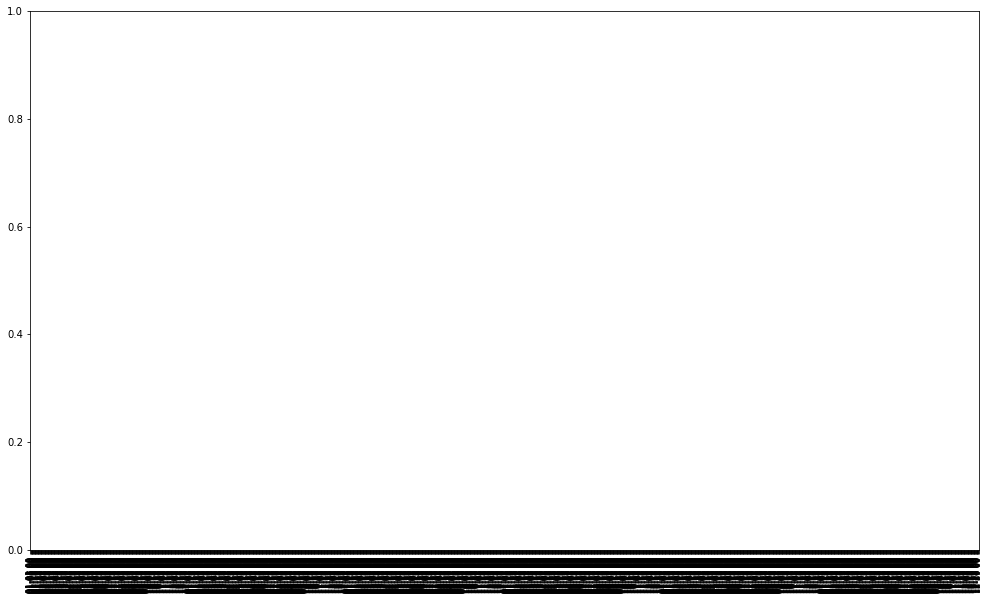

In [ ]:
# Plot datasets
fig = plt.figure(figsize=(17, 11))
fig.autofmt_xdate()

ax = plt.subplot(1, 1, 1)
ax.set_xticks(tick_time_idx)
ax.set_xticklabels(tick_time_labels, rotation=90, fontsize=8)
ax.set_xlim(tick_time_period[0], tick_time_period[-1])
ax.grid(b=True)

p = ax.plot(series_sm_first.index, series_sm_first.values, color='#DA70D6', linestyle='--', lw=2)

ax.set_ylabel('soil moisture [-]', color='#000000')
ax.set_ylim(0, 1)
plt.show()